In [13]:
#importing essential library
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt #for Visualization
%matplotlib inline

In [20]:
df_global=pd.read_csv('global_data.csv') # importing 'Global tempreature data'
df_city=pd.read_csv('berlin_data.csv')  # importing 'Berlin city tempreature data'

In [25]:
#View first 5 rows of the Berlin city data
df_city.head()

,year,city,country,avg_temp
0,1743,Berlin,Germany,6.33
1,1744,Berlin,Germany,10.36
2,1745,Berlin,Germany,1.43
3,1746,Berlin,Germany,NaN
4,1747,Berlin,Germany,NaN


In [26]:
#View first 5 rows of the global temperature data
df_global.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [28]:
#dig deep into the data type and look for missing data
#looks like there are 4 missing entries in avg_temp in the Berlin city_data
# even year column data type is incorrect. It's integer and should be a datetime object - can be overlooked at the moment.
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      271 non-null    int64  
 1   city      271 non-null    object 
 2   country   271 non-null    object 
 3   avg_temp  267 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.6+ KB


The missing avg_temp "NaN" values in city_data dataframe needs some treatment

Fill the missing values in the avg_temp with mean values.

In [30]:
#note before making any changes its always better to have a copy and then make changes, using .copy() method. 
#since the data is small, this step can be ignored
mean_temp = df_city.avg_temp.mean()
#print(mean_temp) #the mean value
df_city.avg_temp.fillna(value=mean_temp, inplace=True)
df_city

,year,city,country,avg_temp
0,1743,Berlin,Germany,6.330000
1,1744,Berlin,Germany,10.360000
2,1745,Berlin,Germany,1.430000
3,1746,Berlin,Germany,8.885393
4,1747,Berlin,Germany,8.885393
...,...,...,...,...
266,2009,Berlin,Germany,10.060000
267,2010,Berlin,Germany,8.610000
268,2011,Berlin,Germany,10.560000
269,2012,Berlin,Germany,9.960000


In [32]:
#summary statistics of the clean city data frame. 
df_city.describe()

,year,avg_temp
count,271.000000,271.000000
mean,1878.000000,8.885393
std,78.375166,0.999816
min,1743.000000,1.430000
25%,1810.500000,8.355000
50%,1878.000000,8.920000
75%,1945.500000,9.475000
max,2013.000000,10.960000


In [33]:
df_global.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [34]:
#summary statistics of the global data frame. 
df_global.describe()

,year,avg_temp
count,266.000000,266.000000
mean,1882.500000,8.369474
std,76.931788,0.584747
min,1750.000000,5.780000
25%,1816.250000,8.082500
50%,1882.500000,8.375000
75%,1948.750000,8.707500
max,2015.000000,9.830000


# Calculate "Moving Average" for the Global and Berlin city data

In [35]:
global_mavg = df_global['avg_temp'].rolling(15).mean()
local_mavg = df_city['avg_temp'].rolling(15).mean()

# Data visualization using matplotlib

Line chart : Berlin Vs Global average temperature

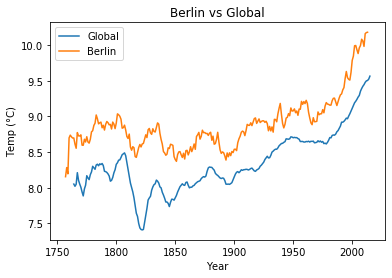

In [36]:
plt.title("Berlin vs Global")
plt.plot(df_global['year'], global_mavg, label='Global')
plt.plot(df_city['year'], local_mavg, label='Berlin') 
plt.legend() 
plt.xlabel("Year")
plt.ylabel("Temp (°C)")
plt.show()

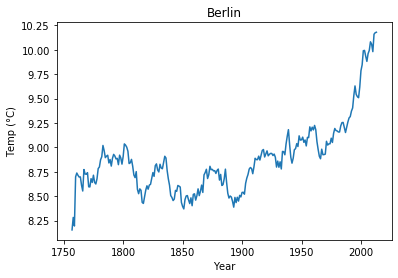

In [38]:
#plotting Moving avg of Berlin temp line chart
plt.title("Berlin")
plt.plot(df_city['year'], local_mavg, label='Berlin')
plt.xlabel("Year")
plt.ylabel("Temp (°C)")
plt.show()

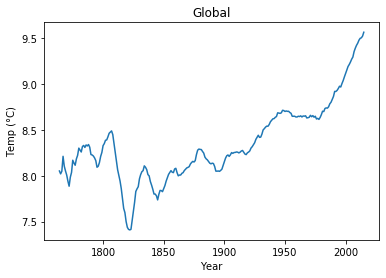

In [39]:
#plotting Moving avg of Global temp line chart
plt.title("Global")
plt.plot(df_global['year'], global_mavg, label='Global')
plt.xlabel("Year")
plt.ylabel("Temp (°C)")
plt.show()

# Stats to figure out difference in mean temperature of Berlin Vs Global 

In [41]:
berlin_avg_mean = df_city['avg_temp'].mean()
global_avg_mean = df_global['avg_temp'].mean()
diff_avg_mean = berlin_avg_mean - global_avg_mean
print("Mean Berlin Average: ", berlin_avg_mean)
print("Mean Global Average: ", global_avg_mean)
print("The Temperature of Berlin City is warmer by", diff_avg_mean, "(°C) than Global")

Mean Berlin Average:  8.885393258426971
Mean Global Average:  8.36947368421053
The Temperature of Berlin City is warmer by 0.5159195742164417 (°C) than Global


# Conclusion

Berlin is slightly warmer than global average, ie, only by 0.5159 degrees Celsius higher than global.

Berlin and Global avg temperatures are pretty much alike as they are both cold.

Berlin is the capital of Germany and is the part of Europe, where temperature is usually low. Berlin temperature fluctuates a lot as seen from Berlin line chart, but from 1970, there is an increase of avg temp by almost 2 degrees.

In the past hundred years, a definite rise in temperature can be observed in both Global and Berlin data. From late 90's the temperature is rising without any significant drops.

Hence, we can conclude that the world is definitely getting hotter. 

